# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Mutual information



# What is mutual information?
<hr style = "border:2px solid black" ></hr>

    
- "Mutual information" is a similar to correlation in but it can detect **any** kind of relationship, while correlation only detects *linear* relationships.
<br><br>

- The **mutual information** (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.
<br><br>

- Uncertainty is measured using "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurence of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.
<br><br>
- **MI=0**: quantities are independent.
- **MI>0**: there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. Mutual information is a logarithmic quantity, so it increases very slowly.



# Practical suggestions
<hr style = "border:2px solid black" ></hr>


- Here are some things to remember when applying mutual information
    - MI can help you to understand the *relative potential* of a feature as a predictor of the target, considered by itself.
    - It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI *can't detect interactions* between features. It is a **univariate** metric.
    - The *actual* usefulness of a feature *depends on the model you use it with*. 
    - A feature is only useful to the extent that its relationship with the target is one your model can learn. 
    - Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. 
    - You may need to transform the feature first to expose the association.



# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Import dataset
<hr style = "border:2px solid black" ></hr>


- The  dataset consists of 193 cars from the 1985 model year. 
- The goal for this dataset is to predict a car's `price` (the target) from 23 of the car's features, such as `make`, `body_style`, and `horsepower`. 
- In this example, we'll rank the features with mutual information and investigate the results by data visualization.
- **WARNING** This particular dataset has some **?** characters. We'll first turn them into a NaN and then we'll drop the row.



In [2]:
df = pd.read_csv("../DATASETS/Automobile_data.csv")
df = df.replace("?", np.NaN)
df = df.dropna(how = 'any', axis = 0) 
df.drop(columns = "normalized-losses", inplace = True)
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [3]:
df["price"] = df["price"].astype("float")

df["price"].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [4]:
df["length"].describe()

count    159.000000
mean     172.413836
std       11.523177
min      141.100000
25%      165.650000
50%      172.400000
75%      177.800000
max      202.600000
Name: length, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   make               159 non-null    object 
 2   fuel-type          159 non-null    object 
 3   aspiration         159 non-null    object 
 4   num-of-doors       159 non-null    object 
 5   body-style         159 non-null    object 
 6   drive-wheels       159 non-null    object 
 7   engine-location    159 non-null    object 
 8   wheel-base         159 non-null    float64
 9   length             159 non-null    float64
 10  width              159 non-null    float64
 11  height             159 non-null    float64
 12  curb-weight        159 non-null    int64  
 13  engine-type        159 non-null    object 
 14  num-of-cylinders   159 non-null    object 
 15  engine-size        159 non-null    int64  
 16  fuel-system        159 non


- For label encoding we are going to use label encoding.
- There are differne method available but pandas has a method called 'factorize()'
- This method **will not** add an additional column.
- See in the references for a description on how this method differs from the others.



In [20]:
# Before
df["fuel-type"]

3         gas
4         gas
6         gas
8         gas
10        gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 159, dtype: object

In [19]:
# After using fatorize() method
df["fuel-type"].factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0]), Index(['gas', 'diesel'], dtype='object'))

In [ ]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [21]:
X

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,2,0,0,0,0,0,0,0,99.8,176.6,...,0,109,0,0,0,10.0,0,0,24,30
4,2,0,0,0,0,0,1,0,99.4,176.6,...,1,136,0,0,0,8.0,1,0,18,22
6,1,0,0,0,0,0,0,0,105.8,192.7,...,1,136,0,0,0,8.5,2,0,19,25
8,1,0,0,1,0,0,0,0,105.8,192.7,...,1,131,0,1,0,8.3,3,0,17,20
10,2,1,0,0,1,0,2,0,101.2,176.8,...,0,108,0,2,1,8.8,4,1,23,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,17,0,0,0,0,2,0,109.1,188.8,...,0,141,0,32,13,9.5,44,4,23,28
201,-1,17,0,1,0,0,2,0,109.1,188.8,...,0,141,0,32,13,8.7,26,19,19,25
202,-1,17,0,0,0,0,2,0,109.1,188.8,...,2,173,0,15,30,8.8,46,0,18,23
203,-1,17,1,1,0,0,2,0,109.1,188.8,...,2,145,4,31,0,23.0,47,6,26,27


In [10]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(
        X, y.values.ravel(), discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
# Show a few features with their MI scores
mi_scores[::3]

curb-weight         1.606471
engine-size         0.878346
length              0.702990
bore                0.577412
peak-rpm            0.410623
num-of-cylinders    0.257237
engine-type         0.113451
fuel-type           0.053195
Name: MI Scores, dtype: float64

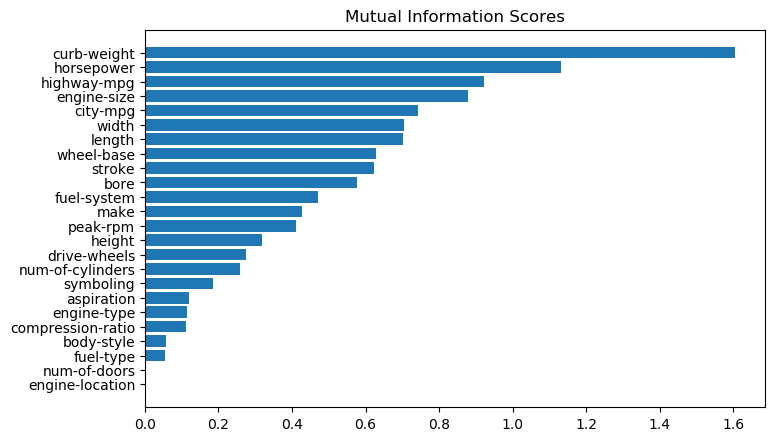

In [11]:
# Bar plot to make comparisions easier:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


- As we might expect, the high-scoring 'curb_weight' feature exhibits a strong relationship with price, the target.
- The `fuel_type` feature has a fairly low MI score, but as we can see from the figure, it clearly separates two `price` populations with different trends within the `horsepower` feature. 
- This indicates that `fuel_type` contributes an interaction effect and might not be unimportant after all. Before deciding a feature is unimportant from its MI score, it's good to investigate any possible interaction effects -- domain knowledge can offer a lot of guidance here.



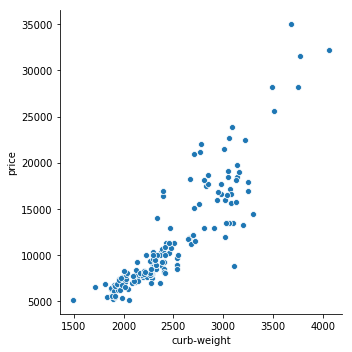

In [12]:
sns.relplot(x="curb-weight", y="price", data=df);

In [13]:
# If you do not turn them into float, it'll throw you an error. See referece below.
df["horsepower"] = df["horsepower"].astype("float")

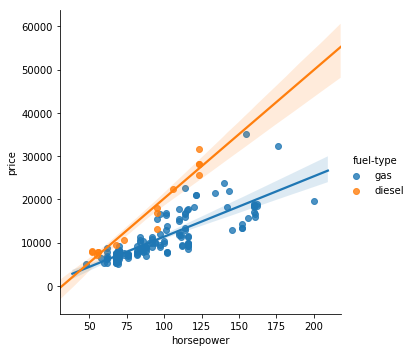

In [14]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df);

# References
<hr style = "border:2px solid black" ></hr>


- https://www.kaggle.com/ryanholbrook/mutual-information
- https://www.kaggle.com/toramky/automobile-dataset
- [Why do need to cast some column while using lmplot](https://www.py4u.net/discuss/159827)
- [pandas factorize()](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.factorize.html)
- ['factorize' vs. 'LabelEncoder' vs. 'get_dummies' vs. 'OneHotEncoder'](https://stackoverflow.com/questions/40336502/want-to-know-the-diff-among-pd-factorize-pd-get-dummies-sklearn-preprocessing/40338956)

